# Internet Traffic Prediction

Business Objective:

The goal is to predict internet traffic using a time-series forecasting technique to optimize resource allocation. Many real-world organizations, such as e-commerce retailers like Amazon, Ebay, and others, use such applications to predict and monitor internet traffic. You can forecast the Internet traffic in this project using time-series models as ARIMA and Holt-Winters. This project involves comparing the performance of the time-series prediction models designed of different approaches. 


# importing required lib's

In [1]:
#impoorting basic required lib's
import pandas as pd      #pandas libs use to do work on datasets perform some ops like analiyzing,cleaning,imputing the data's
import numpy as np       #numpy lib are used to perform mathematical operations and mainly deals with array
import matplotlib.pyplot as plt #matplotlib is used for ploting and to visulize the data
import seaborn as sns     #seaborn libs are used for different kind of plots with color full visualization init
from datetime import datetime #datetime libs is used to work with date and time,mainly for manipulating dates and time
import warnings
warnings.filterwarnings('ignore')

# Exploratory analysis of time series data

#  Extracting the data

In [2]:
#reading the datasets using pandas 
df=pd.read_csv('Website Vistiors Daywise - Sheet1 (1).csv')
df.head()

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870


In [3]:
#size of the Datasets
df.shape

(173, 2)

In [4]:
#checking the null values
df.isnull().sum()

Date              0
Daily Visitors    0
dtype: int64

In [5]:
#checking the datatypes of the variables or an attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            173 non-null    object
 1   Daily Visitors  173 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [15]:
#converting the object data type to date time data type 
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.head()

,Date,Daily Visitors
0,2021-10-01,2649
1,2021-10-02,2000
2,2021-10-03,2011
3,2021-10-04,3219
4,2021-10-05,3870


In [17]:
#Features Date type as been Converted
df.dtypes

Date              datetime64[ns]
Daily Visitors             int64
dtype: object

In [19]:
#setting the DateTime as Index

df=df.set_index('Date')
df.tail()

,Daily Visitors
Date,
2022-03-18,2494
2022-03-19,2976
2022-03-20,2534
2022-03-21,3641
2022-03-22,4031


# Plot the time series

<AxesSubplot:xlabel='Date', ylabel='Daily Visitors'>

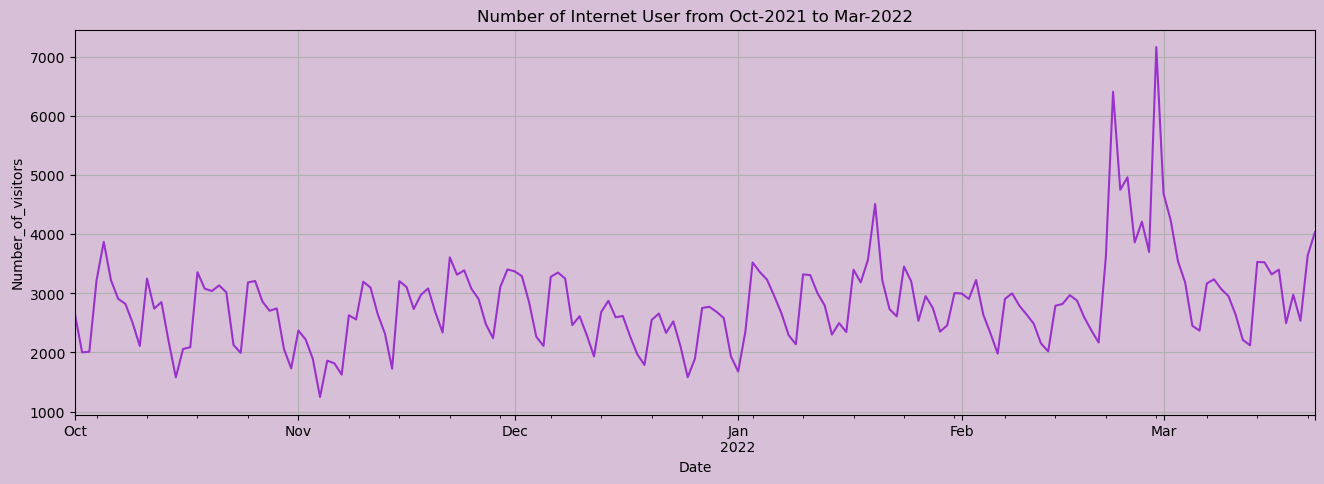

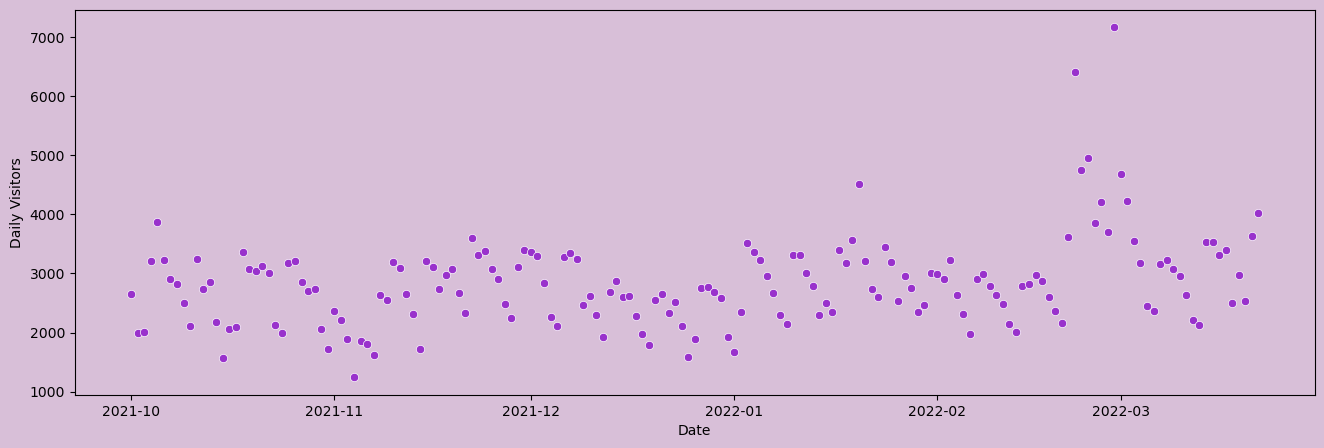

In [23]:
#ok lets see the plots how the  Internet User Visiting varies with respect to time
plt.figure(facecolor='thistle')
ax=plt.axes()
ax.set_facecolor('thistle')
df['Daily Visitors'].plot(title='Number of Internet User from Oct-2021 to Mar-2022',figsize=(16,5),c='darkorchid',ylabel='Number_of_visitors',grid=True);
#the same as above plot but this is scatter plot to find the distribution of data's
plt.figure(figsize=(16,5),facecolor='thistle')
ax=plt.axes()
ax.set_facecolor('thistle')
sns.scatterplot(data=df.iloc[:,0],color='darkorchid',markers='*',)

<AxesSubplot:xlabel='Daily Visitors', ylabel='Density'>

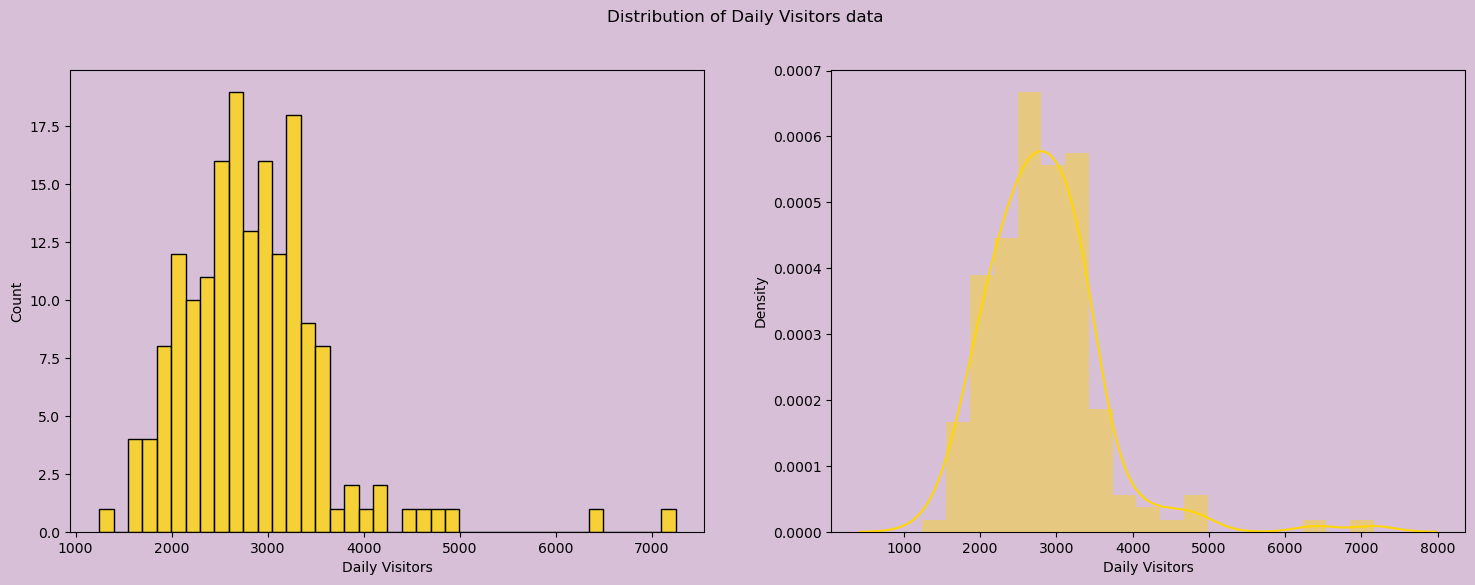

In [24]:
#finding whether the data's are normalliy distributed by visualizing through hist plots
f, axes = plt.subplots(1, 2,figsize=(18, 6),facecolor='thistle')
axes[0].set_facecolor('thistle')
axes[1].set_facecolor('thistle')
plt.suptitle('Distribution of Daily Visitors data')
sns.histplot(df['Daily Visitors'],color='gold',binwidth=150,cbar='black',ax=axes[0])
sns.distplot(df['Daily Visitors'],color='gold',ax=axes[1])

In [25]:
#finding the skewness and kurtosis values
print('skewness of  Daily Visitors :',df['Daily Visitors'].skew())
print('peakness of  Daily Visitors :',df['Daily Visitors'].kurtosis())

skewness of  Daily Visitors : 1.8446454060467907
peakness of  Daily Visitors : 7.81931009981425


In [29]:
#resetting the index 
df=df.reset_index()

,Date,Daily Visitors
0,2021-10-01,2649
1,2021-10-02,2000
2,2021-10-03,2011
3,2021-10-04,3219
4,2021-10-05,3870


In [30]:
#let's create more visulaization so need to create some features with respect to date time

df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['name_of_week']=df['Date'].dt.weekday
df.head()

,Date,Daily Visitors,year,month,name_of_week
0,2021-10-01,2649,2021,10,4
1,2021-10-02,2000,2021,10,5
2,2021-10-03,2011,2021,10,6
3,2021-10-04,3219,2021,10,0
4,2021-10-05,3870,2021,10,1


In [31]:
#setting date as Index

df=df.set_index('Date')
df.tail()

,Daily Visitors,year,month,name_of_week
Date,,,,
2022-03-18,2494,2022,3,4
2022-03-19,2976,2022,3,5
2022-03-20,2534,2022,3,6
2022-03-21,3641,2022,3,0
2022-03-22,4031,2022,3,1


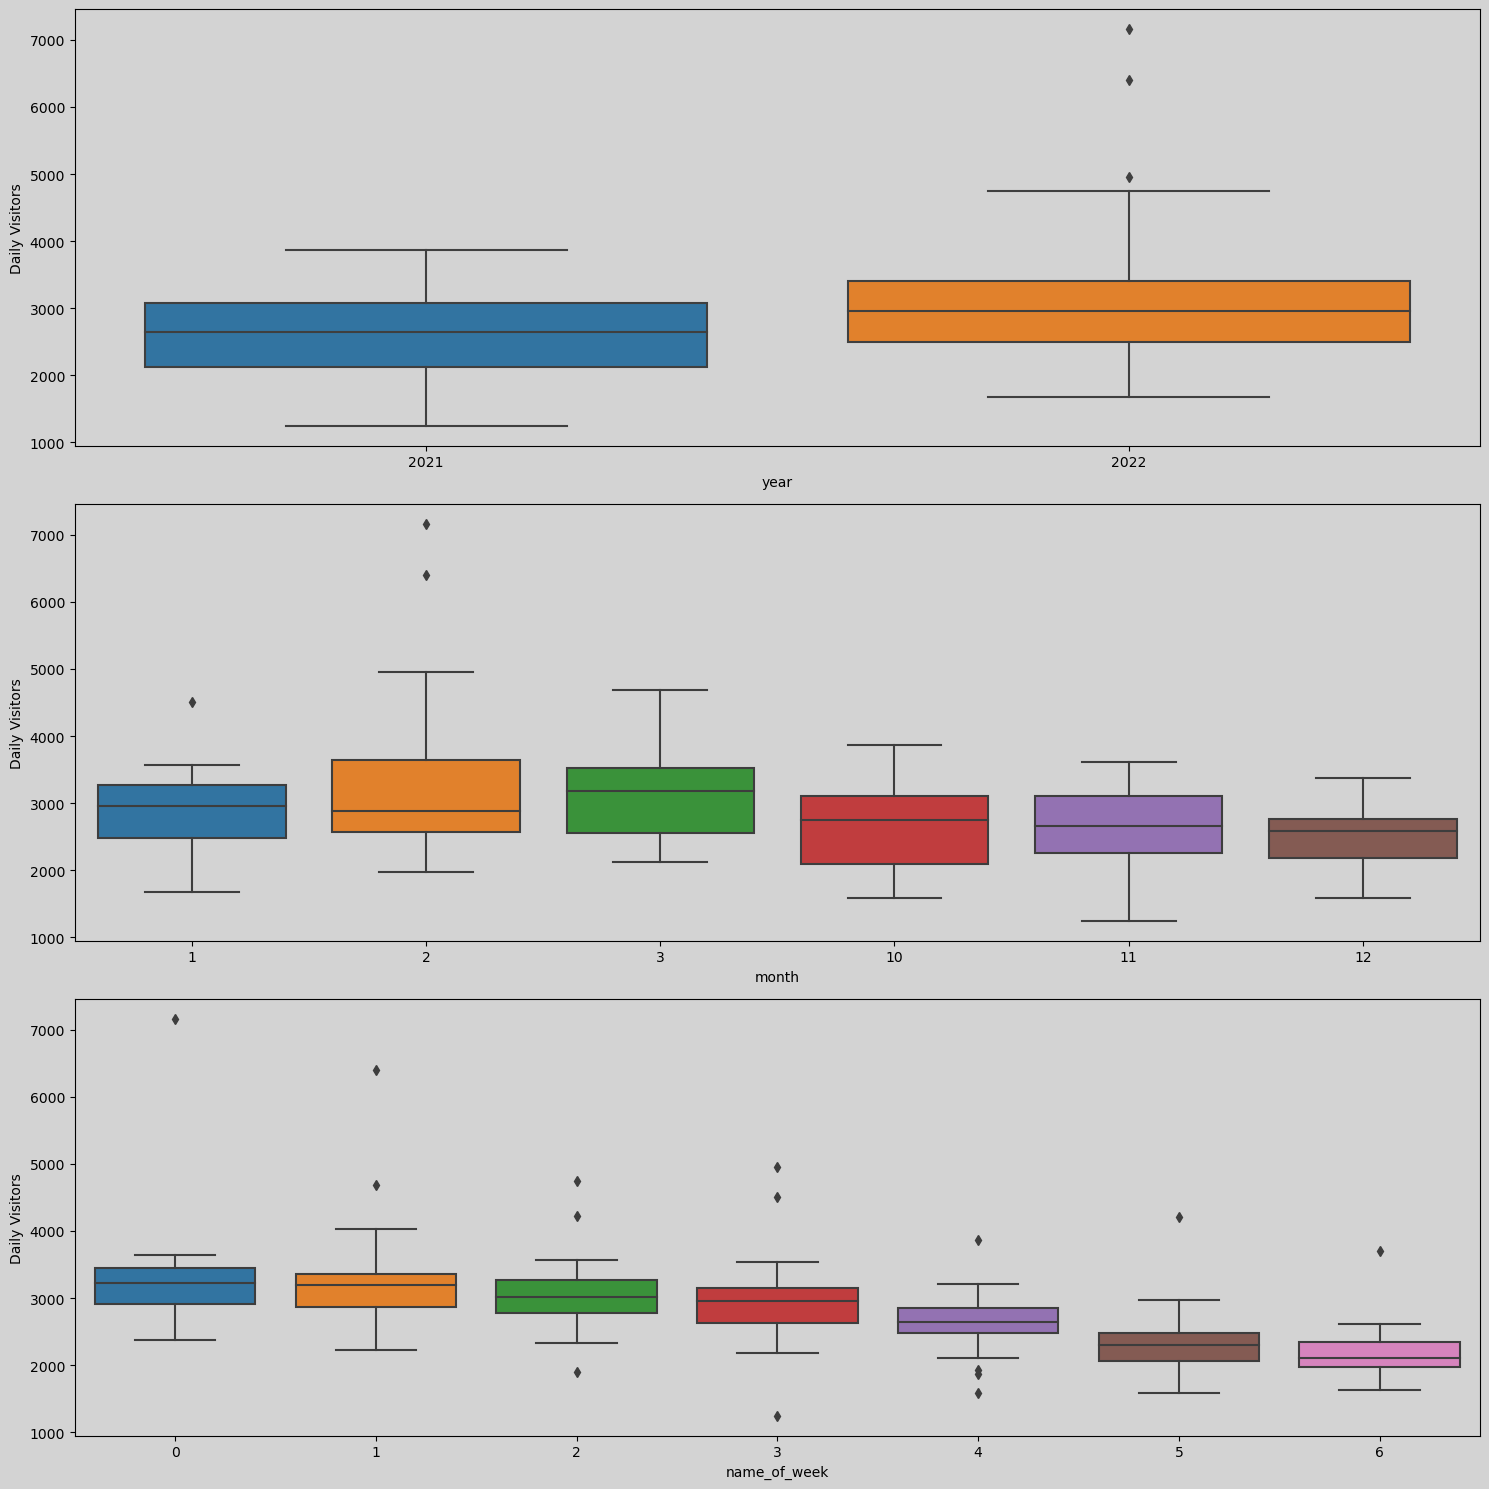

In [34]:
#visulizing the boxplots for year,month,time v/s power consumption

fig, axes = plt.subplots(3,1,figsize=(15, 15),facecolor='lightgrey', sharey=True)
axes[0].set_facecolor('lightgrey')
axes[1].set_facecolor('lightgrey')
axes[2].set_facecolor('lightgrey')

sns.boxplot(ax=axes[0],x=df['year'],y=df['Daily Visitors'],)
sns.boxplot(ax=axes[1],x=df['month'],y=df['Daily Visitors'])
sns.boxplot(ax=axes[2],x=df['name_of_week'],y=df['Daily Visitors'])

plt.tight_layout()
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2021-10-01 to 2022-03-22
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Daily Visitors  173 non-null    int64
 1   year            173 non-null    int64
 2   month           173 non-null    int64
 3   name_of_week    173 non-null    int64
dtypes: int64(4)
memory usage: 6.8 KB


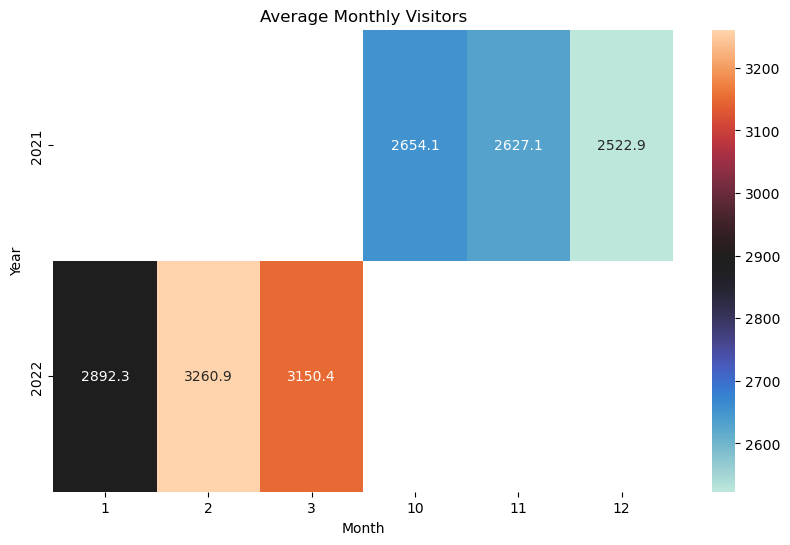

In [49]:
#heatmap represents the Total Number of Visitors with respect to year and month
monthly_user = df.groupby(['year', 'month'])['Daily Visitors'].mean().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(monthly_consumption,cmap="icefire", fmt=".1f",annot=True)
plt.title('Average Monthly Visitors')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

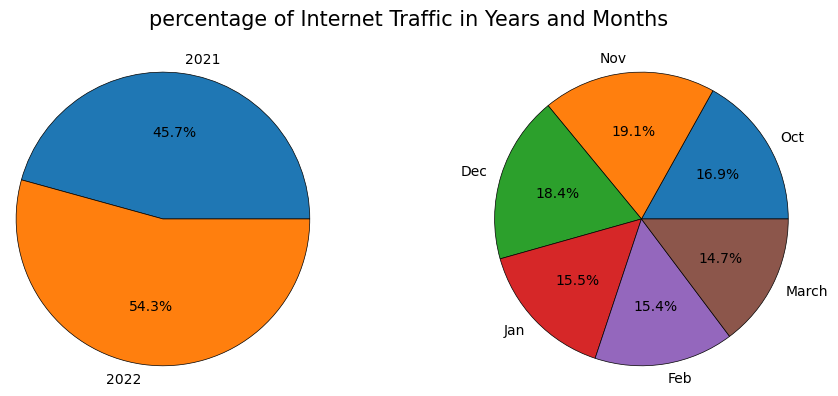

In [63]:
#pie plots represents the percentage of Internet Traffic  of years
year=df.year.unique()
value=df.groupby('year')['Daily Visitors'].mean()
wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.pie(value,autopct = lambda pct: func(pct, df['Daily Visitors']),labels=year,wedgeprops = wp,radius=1.2);

new_d=df.copy()
new_d['month']=df['month'].apply(lambda x: 'Jan' if x==1 else 'Feb' if x==2 else 'March'if x==3 else 'Oct' if x==10 else 'Nov'  if x==11 else 'Dec' if x==12 else '') 
new_d.month.unique()
months=[new_d[new_d['month']=='Jan']['Daily Visitors'].mean(),new_d[new_d['month']=='Feb']['Daily Visitors'].mean(),new_d[new_d['month']=='March']['Daily Visitors'].mean(),new_d[new_d['month']=='Oct']['Daily Visitors'].mean(),new_d[new_d['month']=='Nov']['Daily Visitors'].mean(),new_d[new_d['month']=='Dec']['Daily Visitors'].mean()]
label=new_d.month.unique()

plt.subplot(1,2,2)
plt.suptitle('percentage of Internet Traffic in Years and Months',fontsize=15)
plt.pie(months,autopct = lambda pct: func(pct, df['Daily Visitors']),labels=label,wedgeprops = wp,radius=1.2);
plt.tight_layout()


In [67]:
#creating the new column named as day
df['Day']=df['Date'].dt.day
df=df.set_index('Date')
df.head()

,Date,Daily Visitors,year,month,name_of_week,Day
0,2021-10-01,2649,2021,10,4,1
1,2021-10-02,2000,2021,10,5,2
2,2021-10-03,2011,2021,10,6,3
3,2021-10-04,3219,2021,10,0,4
4,2021-10-05,3870,2021,10,1,5


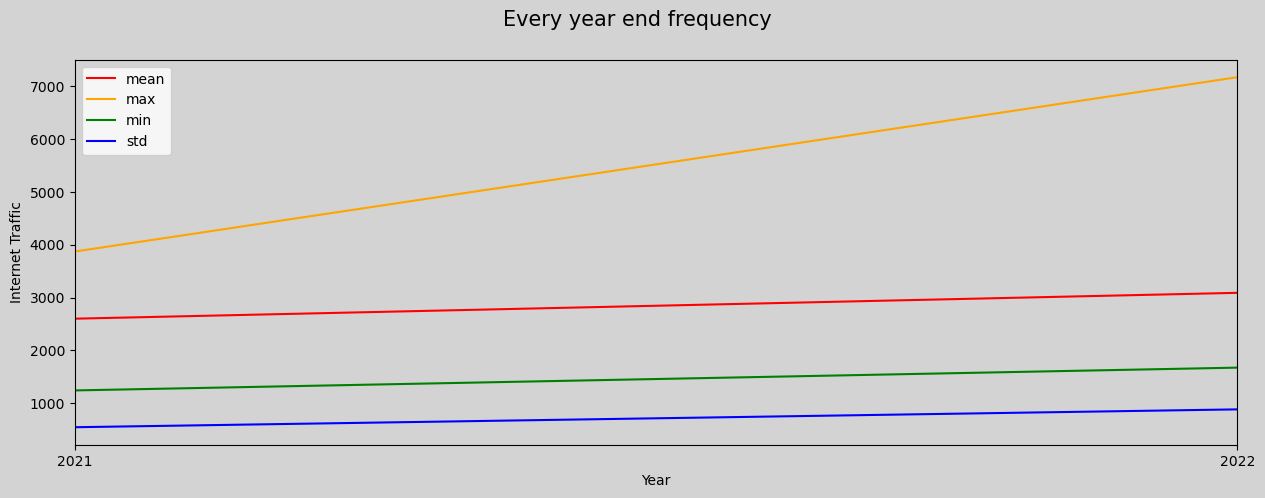

In [72]:
#Resampling involves changing the frequency of your time series observations
#the below plot represents the avg,min and max power consumption 

plt.figure(figsize=(15,5),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
df['Daily Visitors'].resample(rule='A').mean().plot(c='red')
df['Daily Visitors'].resample(rule='A').max().plot(c='orange')
df['Daily Visitors'].resample(rule='A').min().plot(c='green')
df['Daily Visitors'].resample(rule='A').std().plot(c='blue')

plt.suptitle('Every year end frequency',fontsize=15)
plt.xlabel('Year')
plt.ylabel('Internet Traffic')
plt.legend(['mean','max','min','std'])

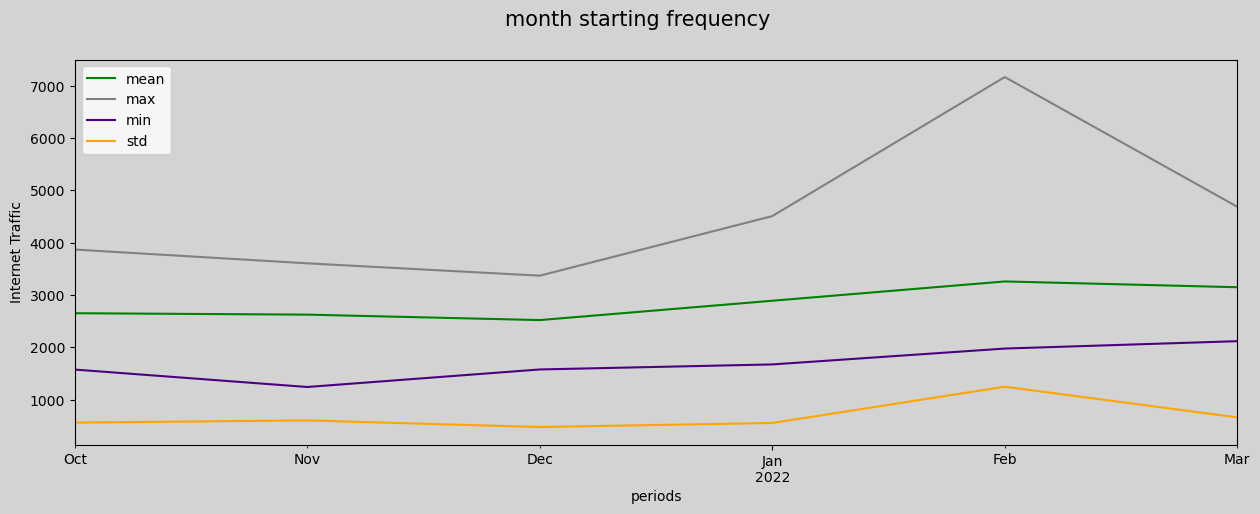

In [71]:
#month starting date frequency
plt.figure(figsize=(15,5),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
df['Daily Visitors'].resample(rule='MS').mean().plot(c='green')
df['Daily Visitors'].resample(rule='MS').max().plot(c='grey')
df['Daily Visitors'].resample(rule='MS').min().plot(c='indigo')
df['Daily Visitors'].resample(rule='MS').std().plot(c='orange')

plt.suptitle('month starting frequency',fontsize=15)
plt.xlabel('periods')
plt.ylabel('Internet Traffic')
plt.legend(['mean','max','min','std'])

# applying rolling mean 

In [73]:
#here i am  applying rolling mean for first 10 data's or 10hours
new_df=df.copy()
new_df['10 data rolling mean']=new_df['Daily Visitors'].rolling(10).mean()
new_df['10 data rolling std']=new_df['Daily Visitors'].rolling(10).std()

In [74]:
new_df

,Daily Visitors,year,month,name_of_week,Day,10 data rolling mean,10 data rolling std
Date,,,,,,,
2021-10-01,2649,2021,10,4,1,NaN,NaN
2021-10-02,2000,2021,10,5,2,NaN,NaN
2021-10-03,2011,2021,10,6,3,NaN,NaN
2021-10-04,3219,2021,10,0,4,NaN,NaN
2021-10-05,3870,2021,10,1,5,NaN,NaN
...,...,...,...,...,...,...,...
2022-03-18,2494,2022,3,4,18,2926.4,532.424267
2022-03-19,2976,2022,3,5,19,2916.8,530.368803
2022-03-20,2534,2022,3,6,20,2874.9,543.577542


Text(0.5, 0.98, 'Rolling Mean(10 days rolling)')

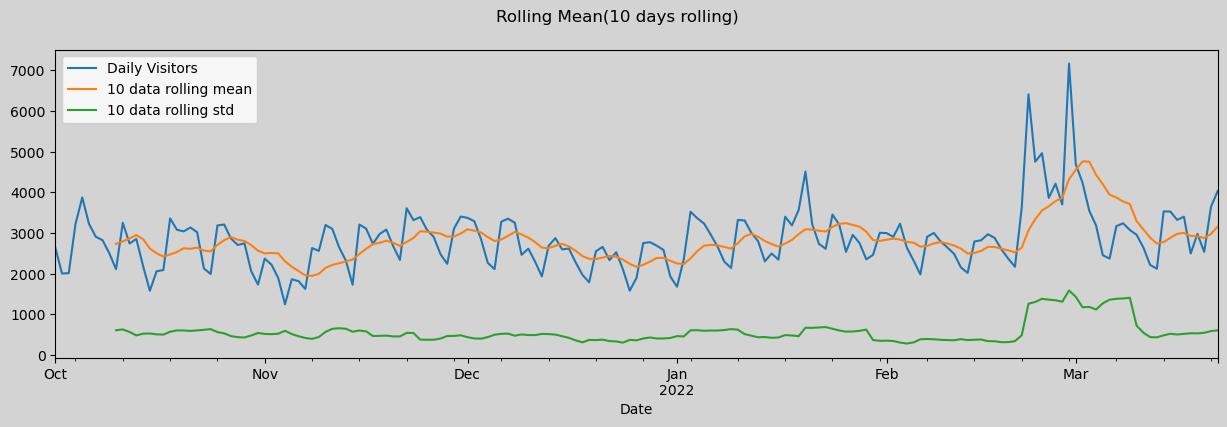

In [79]:
#ploting 
plt.figure(figsize=(15,4),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
new_df[['Daily Visitors','10 data rolling mean','10 data rolling std']].iloc[:].plot(ax=ax)
plt.suptitle('Rolling Mean(10 days rolling)')

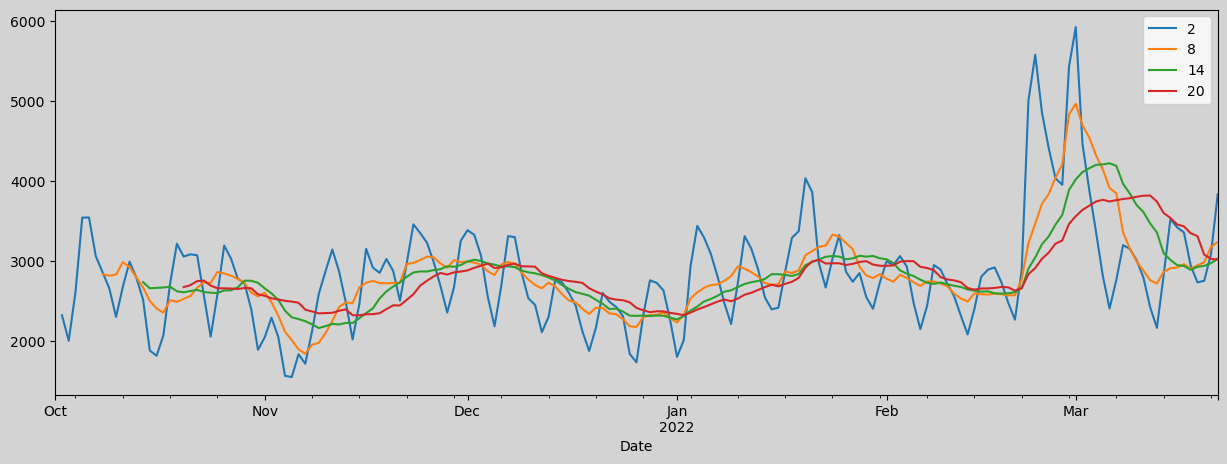

In [80]:
#here i am applying rolling for different number 

plt.figure(figsize=(15,5),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')

for i in range(2,24,6):
    df['Daily Visitors'].iloc[:500].rolling(i).mean().plot()
plt.legend([2,8,14,20])

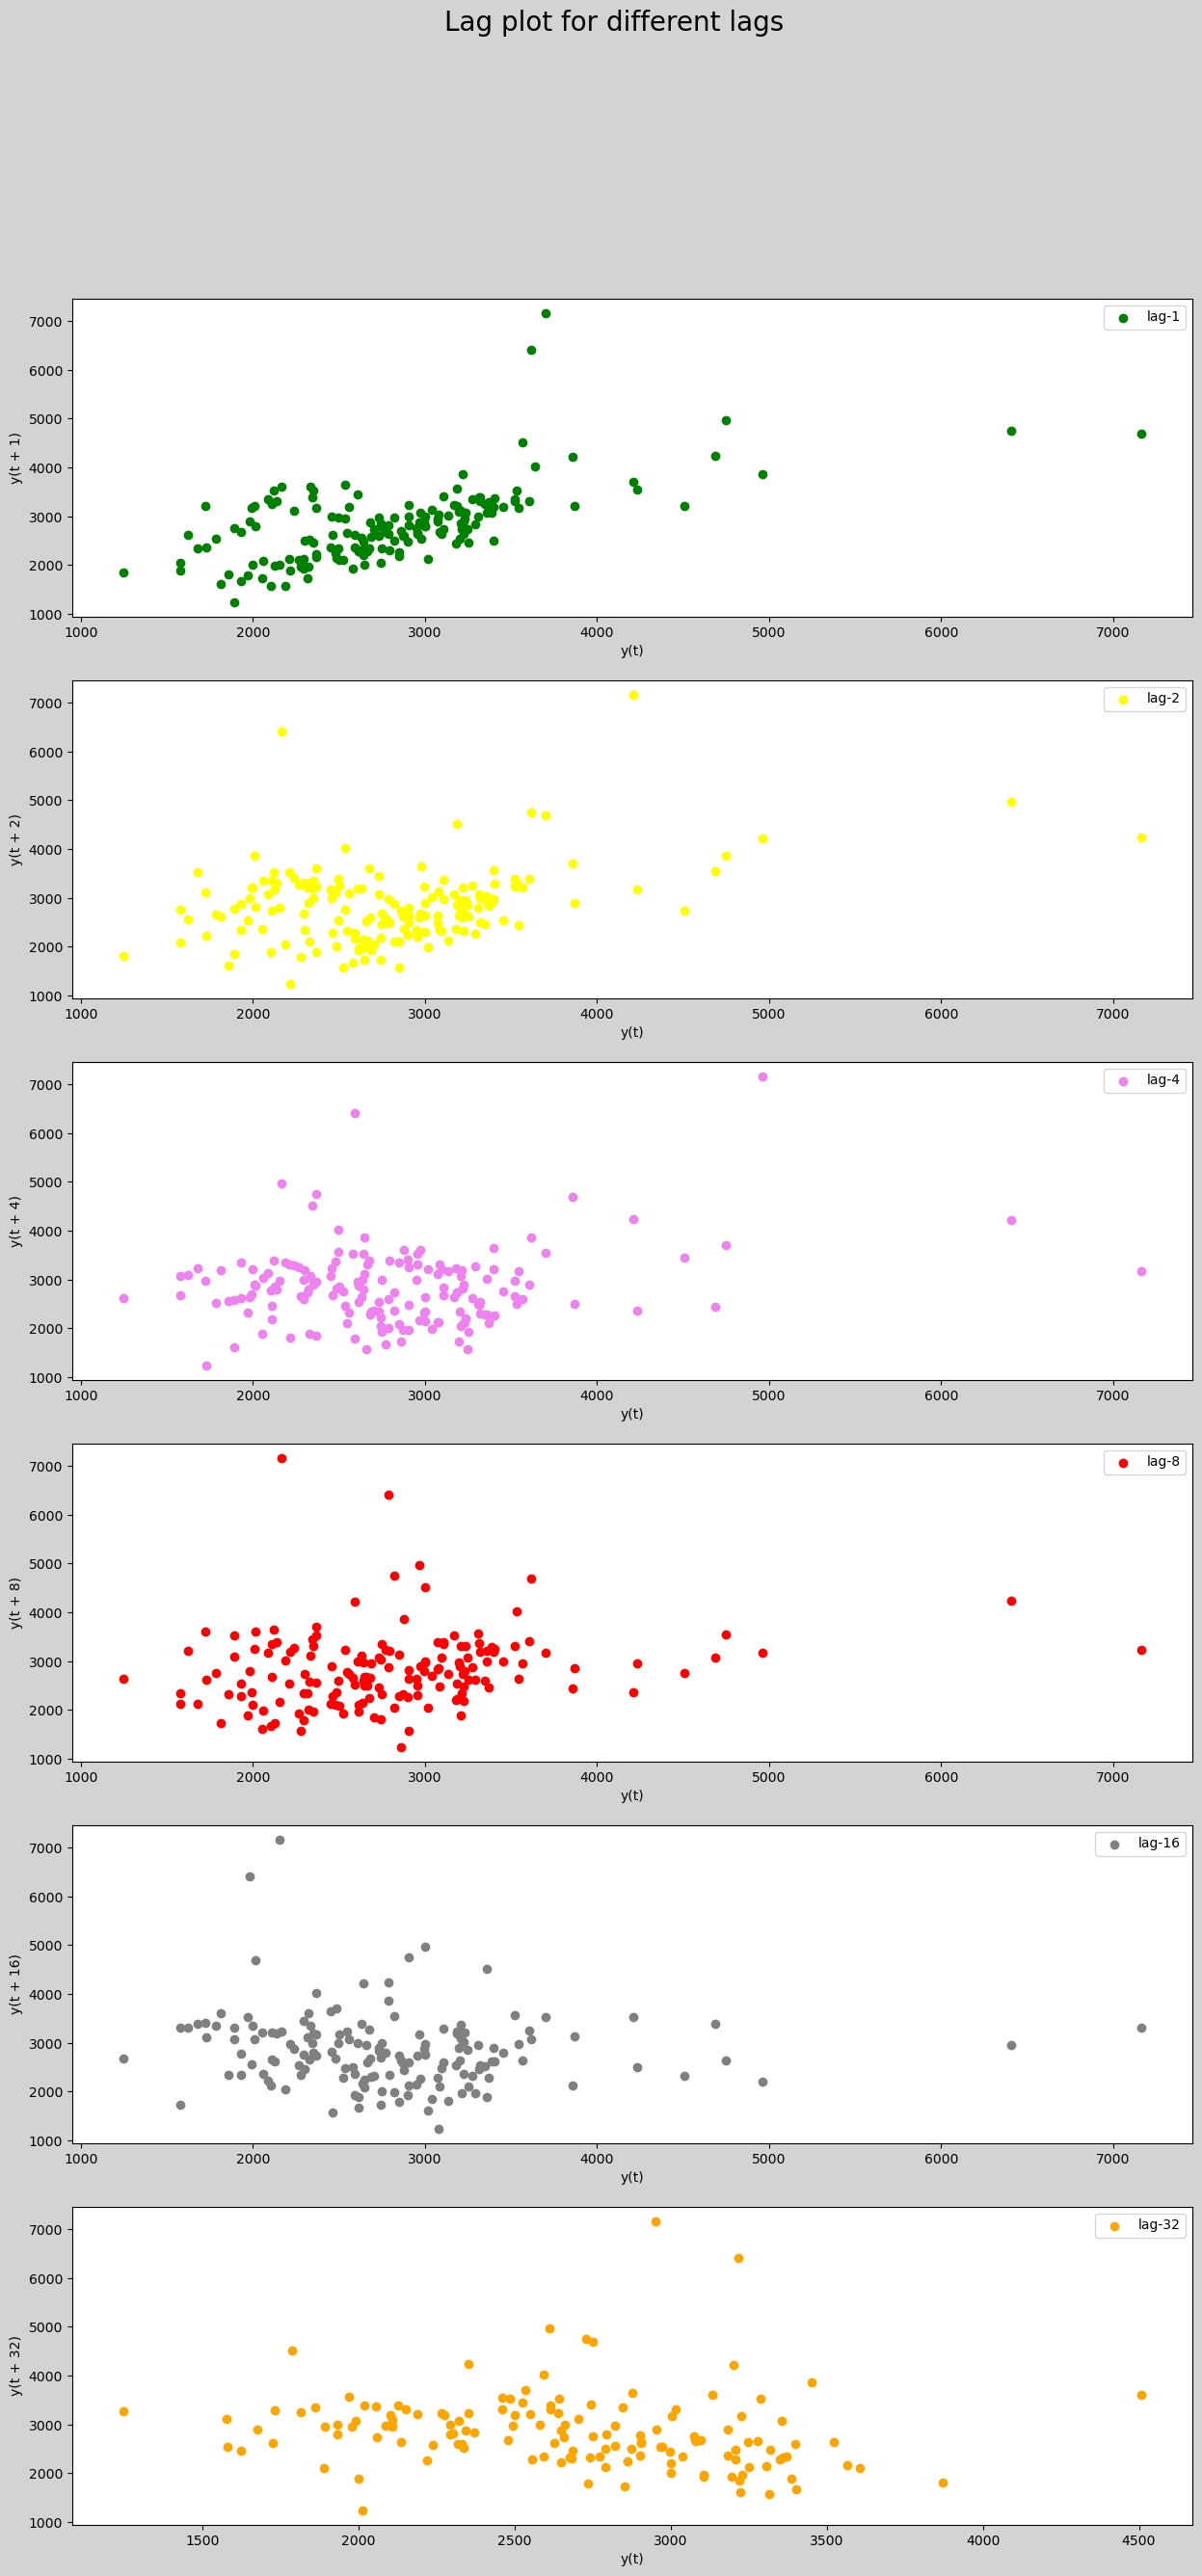

In [83]:
#ploting lag plots to find the autoocorelation and u can find the outliers seasonality and randomness
#this lag plot shows the data for lag1

from pandas.plotting import lag_plot
plt.figure(figsize=(15,30),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.suptitle('Lag plot for different lags',fontsize=20)
plt.subplot(6,1,1)
lag_plot(df['Daily Visitors'],lag=1,c='green')
plt.legend(['lag-1'])
plt.subplot(6,1,2)
lag_plot(df['Daily Visitors'],lag=2,c='yellow')
plt.legend(['lag-2'])
plt.subplot(6,1,3)
lag_plot(df['Daily Visitors'],lag=4,c='violet')
plt.legend(['lag-4'])
plt.subplot(6,1,4)
lag_plot(df['Daily Visitors'],lag=8,c='red')
plt.legend(['lag-8'])
plt.subplot(6,1,5)
lag_plot(df['Daily Visitors'],lag=16,c='grey')
plt.legend(['lag-16'])
plt.subplot(6,1,6)
lag_plot(df['Daily Visitors'],lag=32,c='orange')
plt.legend(['lag-32'])


# ACF and PACF plots

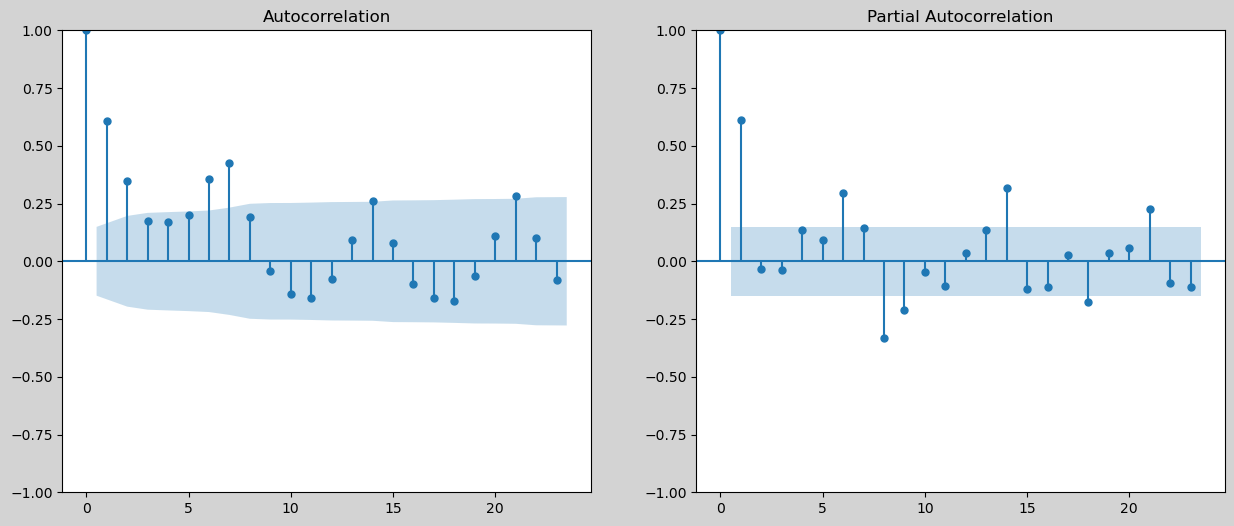

In [85]:
#auto-correlation function which gives us values of auto-correlation of any series with its lagged values
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,axes=plt.subplots(1,2,figsize=(15,6),facecolor='lightgrey')

plot_acf(df['Daily Visitors'],ax=axes[0])
#partial auto-correlation function it finds correlation of the residuals
plot_pacf(df['Daily Visitors'],ax=axes[1])
plt.show()

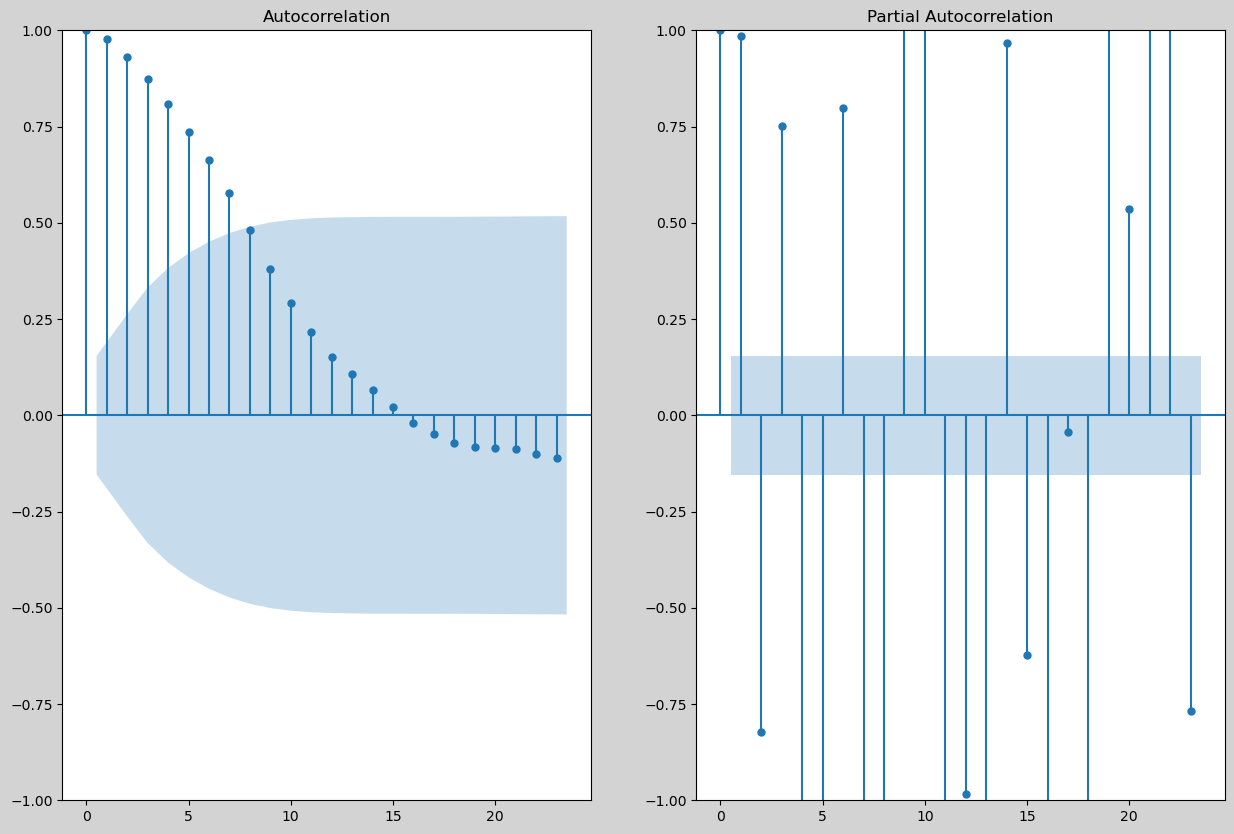

In [87]:
#applying rolling mean folding 12 datas
fig,axes=plt.subplots(1,2,figsize=(15,10),facecolor='lightgrey')
acf = plot_acf(df["Daily Visitors"].rolling(12).mean().dropna(),ax=axes[0])
pacf = plot_pacf(df["Daily Visitors"].rolling(12).mean().dropna(),ax=axes[1])

<AxesSubplot:xlabel='Date', ylabel='seasonal'>

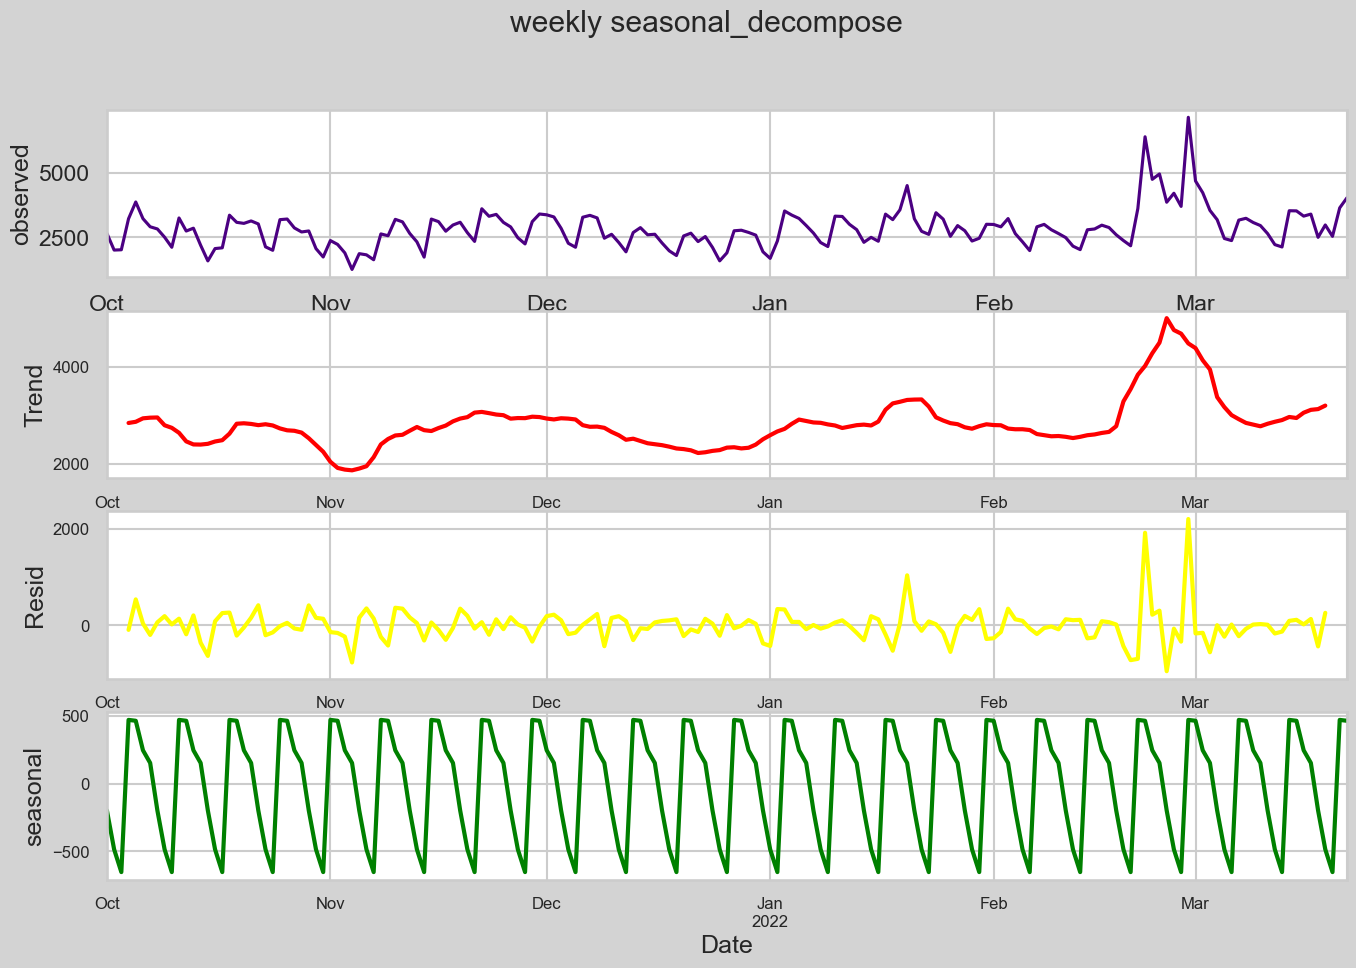

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set_style('whitegrid')
sns.set_context('talk')
res=seasonal_decompose(df['Daily Visitors'].resample('D').mean(),model='additive')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(16,10),facecolor='lightgrey')
plt.suptitle('weekly seasonal_decompose')
df['Daily Visitors'].resample('D').mean().plot(ax=ax1,c='indigo',ylabel='observed')
res.trend.plot(ax=ax2,c='red',lw=3,ylabel='Trend',fontsize=12)
res.resid.plot(ax=ax3,c='yellow',lw=3,ylabel='Resid',fontsize=12)
res.seasonal.plot(ax=ax4,c='green',lw=3,ylabel='seasonal',fontsize=12)

# Augmented Dickey-Fuller (ADF) Test 

In [88]:
#checking Stationary
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [89]:
adf_test(df['Daily Visitors'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.358587
p-value                          0.153768
#Lags Used                      14.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


# From ADF Test We found that p-value is more then 5% It states that Data is Not Stationary

# KPSS TEST to find Stationarity

In [94]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='ct', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [96]:
import warnings
warnings.filterwarnings('ignore')
kpss_test(df['Daily Visitors'])

Results of KPSS Test:
Test Statistic           0.087762
p-value                  0.100000
#Lags Used               6.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
Critical Value (2.5%)    0.176000
Critical Value (1%)      0.216000
dtype: float64


# P value is More then 5% in KPSS it States that  Stationarity exists

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

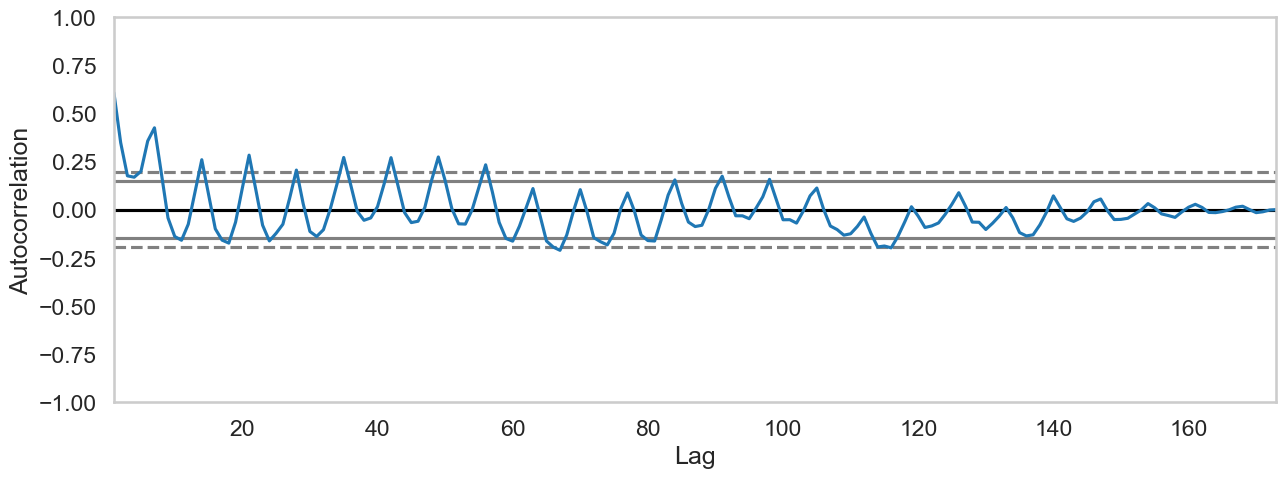

In [102]:
#before imputing data for the above once lets find the correlation
plt.figure(figsize=(15,5))
pd.plotting.autocorrelation_plot(df['2021-10-01':'2022-03-22']['Daily Visitors'].resample('1d').mean())

### Differencing to make data  stationary

In [103]:
# Applying shifting one position to make data stationary

df['Daily Visitors Diff'] = df['Daily Visitors'] - df['Daily Visitors'].shift(1)

df = df.dropna()
df.head()

,Daily Visitors,year,month,name_of_week,Day,Daily Visitors Diff
Date,,,,,,
2021-10-02,2000,2021,10,5,2,-649.0
2021-10-03,2011,2021,10,6,3,11.0
2021-10-04,3219,2021,10,0,4,1208.0
2021-10-05,3870,2021,10,1,5,651.0
2021-10-06,3222,2021,10,2,6,-648.0


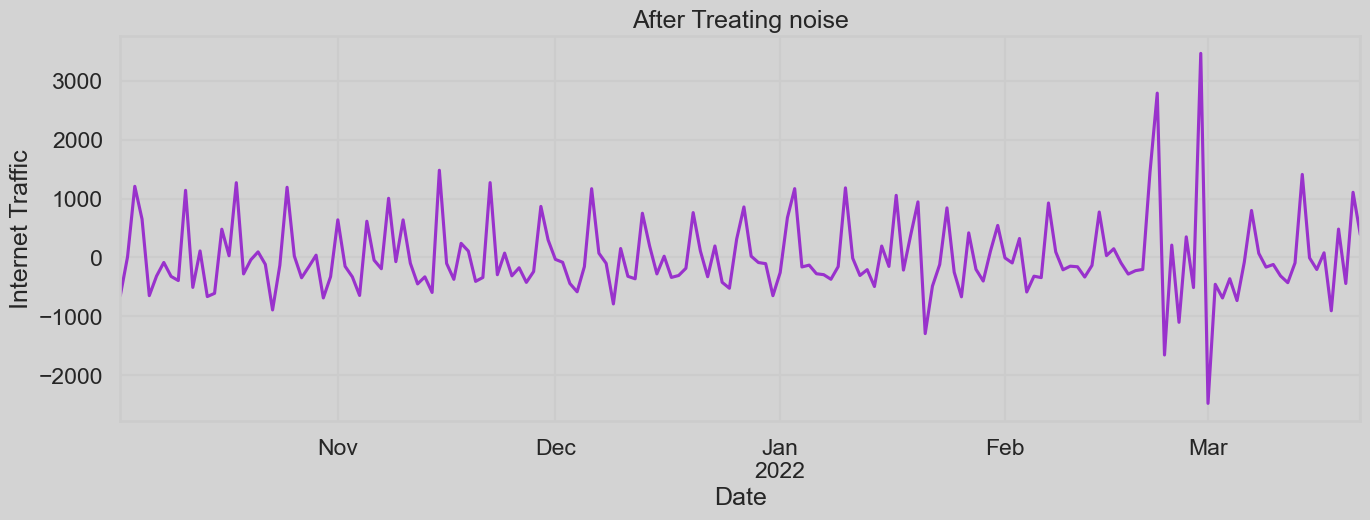

In [111]:
plt.figure(facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
df['Daily Visitors Diff'].plot(title='After Treating noise',figsize=(16,5),c='darkorchid',ylabel='Internet Traffic',grid=True);

In [104]:
adf_test(df['Daily Visitors Diff'])

Results of Dickey-Fuller Test:
Test Statistic                -6.607171e+00
p-value                        6.512663e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.590000e+02
Critical Value (1%)           -3.472161e+00
Critical Value (5%)           -2.879895e+00
Critical Value (10%)          -2.576557e+00
dtype: float64


# P-Value is Less then 5% looks Like Data's are Stationary

In [105]:
import statsmodels.formula.api as smf 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [106]:
df

,Daily Visitors,year,month,name_of_week,Day,Daily Visitors Diff
Date,,,,,,
2021-10-02,2000,2021,10,5,2,-649.0
2021-10-03,2011,2021,10,6,3,11.0
2021-10-04,3219,2021,10,0,4,1208.0
2021-10-05,3870,2021,10,1,5,651.0
2021-10-06,3222,2021,10,2,6,-648.0
...,...,...,...,...,...,...
2022-03-18,2494,2022,3,4,18,-905.0
2022-03-19,2976,2022,3,5,19,482.0
2022-03-20,2534,2022,3,6,20,-442.0


In [108]:
#spliting the Data's as Train and test 
train = df.loc[df.index < '28-02-2022']#5 months data 
test = df.loc[df.index >= '28-02-2022']#1 month data
print(train.shape)
print(test.shape)

(149, 6)
(23, 6)


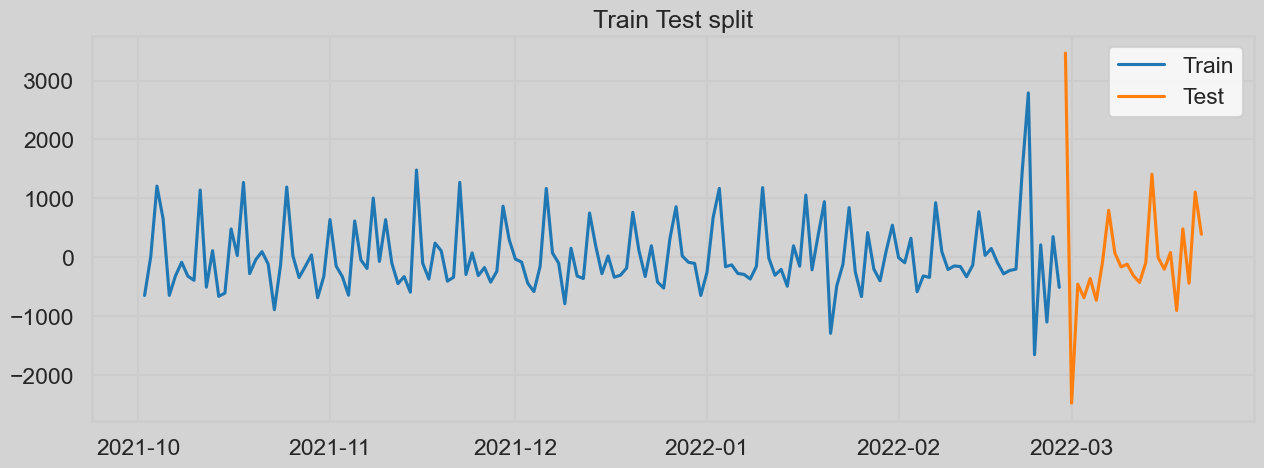

In [110]:
plt.figure(figsize=(15,5),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.title('Train Test split')
plt.plot(train['Daily Visitors Diff'])
plt.plot(test['Daily Visitors Diff'])
plt.legend(['Train','Test'])

# Model building

# Autoregressive model

In [112]:
#AR Model
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(train['Daily Visitors Diff'],lags=1)
results=model.fit()
print(f'value of the aic is :{results.aic}')#Akaike information criterion
print(f'value of the bic is :{results.bic}')#bayesiam information criterion


value of the aic is :2315.393276107301
value of the bic is :2324.3849129285936


In [113]:
ypred=results.forecast(len(test.index))
ypred

2022-02-28    52.487571
2022-03-01     8.182080
2022-03-02    11.665700
2022-03-03    11.391793
2022-03-04    11.413329
2022-03-05    11.411636
2022-03-06    11.411769
2022-03-07    11.411759
2022-03-08    11.411759
2022-03-09    11.411759
2022-03-10    11.411759
2022-03-11    11.411759
2022-03-12    11.411759
2022-03-13    11.411759
2022-03-14    11.411759
2022-03-15    11.411759
2022-03-16    11.411759
2022-03-17    11.411759
2022-03-18    11.411759
2022-03-19    11.411759
2022-03-20    11.411759
2022-03-21    11.411759
2022-03-22    11.411759
Freq: D, dtype: float64

In [114]:
#mean square error
AR_mean_square_error=np.sqrt(mean_squared_error(test['Daily Visitors Diff'],ypred))
AR_mean_square_error

1039.1858848032248

In [115]:
test['AR_pred']=ypred.values

In [1]:
plt.figure(figsize=(15,5),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.title('Actual Internet Traffic of test data v/s AR_model predicted data')
plt.plot(test['Daily Visitors Diff'].iloc[:])
plt.legend("actual","predicted")
plt.plot(test.AR_pred.iloc[:])

NameError: name 'plt' is not defined

# SIMPLE EXPONENTIAL  SMOOTHENING METHODE

In [121]:
ses_model = SimpleExpSmoothing(train["Daily Visitors Diff"]).fit(smoothing_level=0.1)
pred_ses = ses_model.forecast(len(test.index))

In [122]:
pred_ses

2022-02-28    16.089293
2022-03-01    16.089293
2022-03-02    16.089293
2022-03-03    16.089293
2022-03-04    16.089293
2022-03-05    16.089293
2022-03-06    16.089293
2022-03-07    16.089293
2022-03-08    16.089293
2022-03-09    16.089293
2022-03-10    16.089293
2022-03-11    16.089293
2022-03-12    16.089293
2022-03-13    16.089293
2022-03-14    16.089293
2022-03-15    16.089293
2022-03-16    16.089293
2022-03-17    16.089293
2022-03-18    16.089293
2022-03-19    16.089293
2022-03-20    16.089293
2022-03-21    16.089293
2022-03-22    16.089293
Freq: D, dtype: float64

In [124]:
SES_rmse=np.sqrt(mean_squared_error(test['Daily Visitors Diff'],pred_ses))
SES_rmse

1045.3976279589972

In [125]:
test['pred_ses']=pred_ses.values

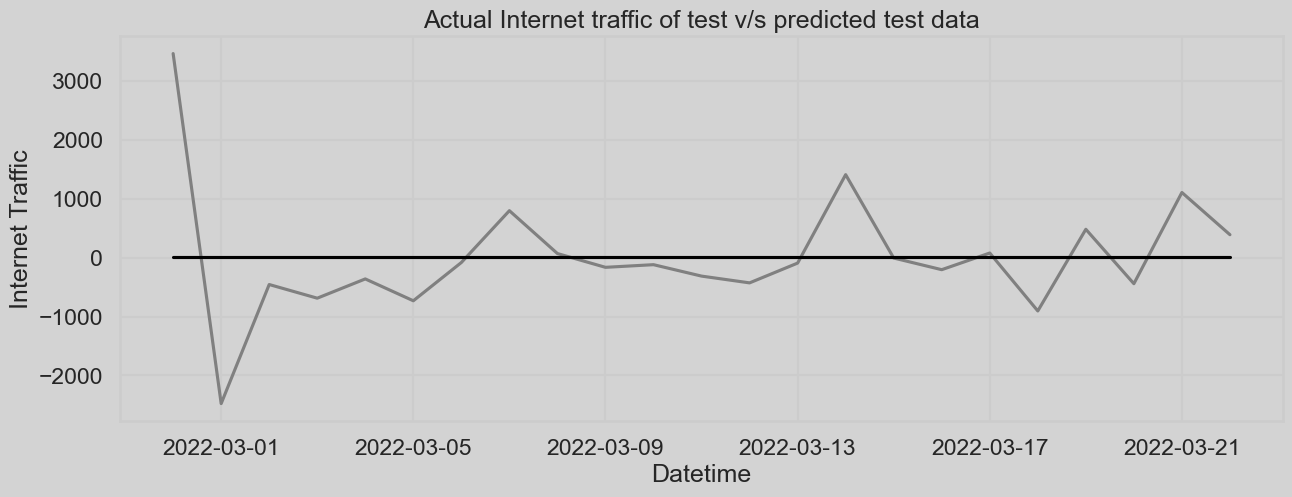

In [127]:
plt.figure(figsize=(15,5),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.plot(test['Daily Visitors Diff'], c='grey');
plt.plot(test['pred_ses'], c='black')
plt.title('Actual Internet traffic of test v/s predicted test data')
plt.xlabel('Datetime')
plt.ylabel('Internet Traffic');

# Holt Winter Exponential Smoothening with Additive Seasonality and Additive Trend

In [150]:
# Building the model
HWE_model_add_add = ExponentialSmoothing(train["Daily Visitors Diff"],seasonal="additive",trend="additive",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model

In [151]:
pred_hwe_add_add = HWE_model_add_add.forecast(len(test))
print(pred_hwe_add_add)

2022-02-28    -62.675243
2022-03-01     70.535192
2022-03-02   -120.059562
2022-03-03    133.099944
2022-03-04     45.450683
2022-03-05     53.505692
2022-03-06    392.039216
2022-03-07   -209.660259
2022-03-08     -3.963526
2022-03-09      5.805352
2022-03-10    268.304308
2022-03-11    -10.894488
2022-03-12   -192.990035
2022-03-13    -59.779601
2022-03-14   -250.374355
2022-03-15      2.785152
2022-03-16    -84.864109
2022-03-17    -76.809100
2022-03-18    261.724424
2022-03-19   -339.975052
2022-03-20   -134.278319
2022-03-21   -124.509441
2022-03-22    137.989515
Freq: D, dtype: float64


In [152]:
test['pred_hwe_add_add']=pred_hwe_add_add.values

In [153]:
hwaa_rmse=np.sqrt(mean_squared_error(test['Daily Visitors Diff'],pred_hwe_add_add))
hwaa_rmse

1115.0140646541852

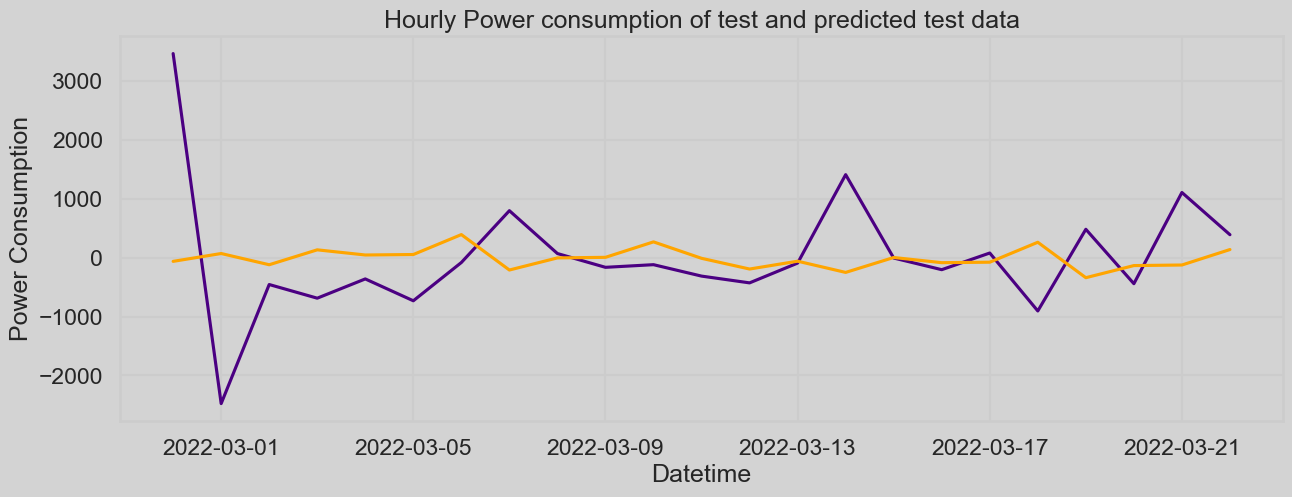

In [154]:
plt.figure(figsize=(15,5),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.plot(test['Daily Visitors Diff'].iloc[:500], c='indigo');
plt.plot(test['pred_hwe_add_add'].iloc[:500], c='orange')
plt.title('Hourly Power consumption of test and predicted test data')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption');

# ARIMA MODEL BUILDING

In [158]:
# import libraries
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [160]:
stepwise_fit = auto_arima(train['Daily Visitors Diff'], trace=True, suppress_warnings=True)
# AIC(Akaike's Information Criterion): for every order assign a score

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2330.154, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2331.241, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2330.434, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2328.175, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 6.345 seconds


In [173]:
# Building arima model
arima_model = ARIMA(train['Daily Visitors Diff'], order=(2,0,2))
arima_model = arima_model.fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Daily Visitors Diff   No. Observations:                  149
Model:                  ARIMA(2, 0, 2)   Log Likelihood               -1146.508
Date:                 Thu, 07 Sep 2023   AIC                           2305.015
Time:                         17:11:03   BIC                           2323.039
Sample:                     10-02-2021   HQIC                          2312.338
                          - 02-27-2022                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1804      3.021      1.384      0.166      -1.741      10.102
ar.L1         -0.2763      0.142     -1.947      0.052      -0.554       0.002
ar.L2          0.4771      0.096      4.961      0.000       0.289       0.666
ma.L1         -0.0601      0.139     -0.432      0.665      -0.333       0.212
ma.L2         -0.9397      0.144     -6.512      0.000      -1.223      -0.657
sigma2      2.751e+05   5.85e-06   4.71e+10      0.000    2.75e+05    2.75e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               249.59
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                             1.62
Prob(H) (two-sided):                  0.07   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.71e+27. Standard errors may be unstable.
"""

In [174]:
# checking how good the model
start=len(train.index)
end=len(train.index)+len(test.index)-1
pred_arima = arima_model.predict(start = start,end = end, typ='levels').rename('ARIMA Predictions')
print(pred_arima)

2022-02-28   -572.342014
2022-03-01    237.878554
2022-03-02   -335.453784
2022-03-03    209.513053
2022-03-04   -214.593080
2022-03-05    162.589189
2022-03-06   -143.964359
2022-03-07    120.688310
2022-03-08    -98.690033
2022-03-09     88.188641
2022-03-10    -68.110070
2022-03-11     64.234083
2022-03-12    -46.901839
2022-03-13     46.945693
2022-03-14    -32.006709
2022-03-15     34.581983
2022-03-16    -21.484226
2022-03-17     25.775966
2022-03-18    -14.030903
2022-03-19     19.515312
2022-03-20     -8.745144
2022-03-21     15.067934
2022-03-22     -4.994527
Freq: D, Name: ARIMA Predictions, dtype: float64


In [175]:
# Ok let's check the accuracy
from sklearn.metrics import mean_squared_error
rmse_arima = np.sqrt(mean_squared_error(test['Daily Visitors Diff'], pred_arima))
print("ARIMA Model RMSE: ", rmse_arima)
print(f'value of the aic is :{arima_model.aic}')#Akaike information criterion
print(f'value of the bic is :{arima_model.bic}')#bayesiam information criterion

ARIMA Model RMSE:  1158.1659183141967
value of the aic is :2305.0151388387085
value of the bic is :2323.0388166743815


In [176]:
test['pred_arima'] = pred_arima.values

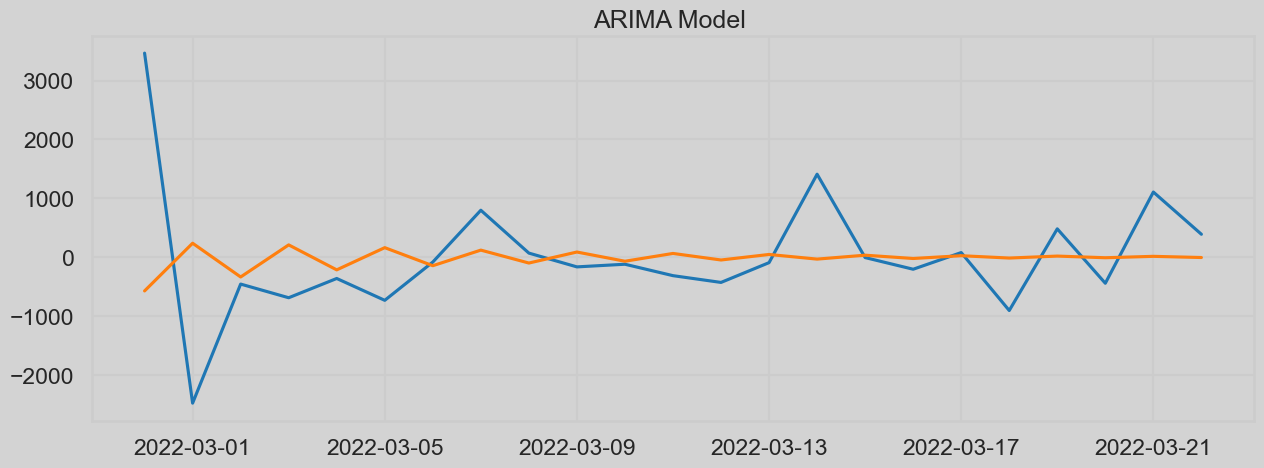

In [177]:
# plotting the actual test data & predicted test data
plt.figure(figsize=(15,5),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.title('Actual Power consumption of test data v/s predicted data')
plt.plot(test['Daily Visitors Diff'])
plt.plot(test.pred_arima)
plt.title("ARIMA Model ");

# BUILDING SARIMA MODEL 

In [183]:
# build the SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(test['Daily Visitors Diff'], order=(2,0,2), seasoanl_order=(1,1,1, 12)).fit()

In [184]:
# checking how good the model
start=len(train.index)
end=len(train.index)+len(test.index)-1
pred_sarima = sarima_model.predict(start = start,end = end, typ='levels').rename('SARIMA Predictions')
print(pred_sarima)

2022-07-27   -1.187986e-16
2022-07-28   -1.391804e-16
2022-07-29   -6.154714e-17
2022-07-30   -7.211752e-17
2022-07-31   -3.188632e-17
2022-08-01   -3.736831e-17
2022-08-02   -1.651965e-17
2022-08-03   -1.936271e-17
2022-08-04   -8.558492e-18
2022-08-05   -1.003296e-17
2022-08-06   -4.433979e-18
2022-08-07   -5.198664e-18
2022-08-08   -2.297154e-18
2022-08-09   -2.693732e-18
2022-08-10   -1.190108e-18
2022-08-11   -1.395781e-18
2022-08-12   -6.165706e-19
2022-08-13   -7.232359e-19
2022-08-14   -3.194325e-19
2022-08-15   -3.747509e-19
2022-08-16   -1.654914e-19
2022-08-17   -1.941804e-19
2022-08-18   -8.573769e-20
Freq: D, Name: SARIMA Predictions, dtype: float64


In [185]:
test['pred_sarima'] = pred_sarima.values

In [186]:
# Ok let's check the accuracy
rmse_sarima = np.sqrt(mean_squared_error(test['Daily Visitors Diff'], test['pred_sarima']))
print("SARIMA Model RMSE: ", rmse_sarima)

SARIMA Model RMSE:  1045.4959713394196


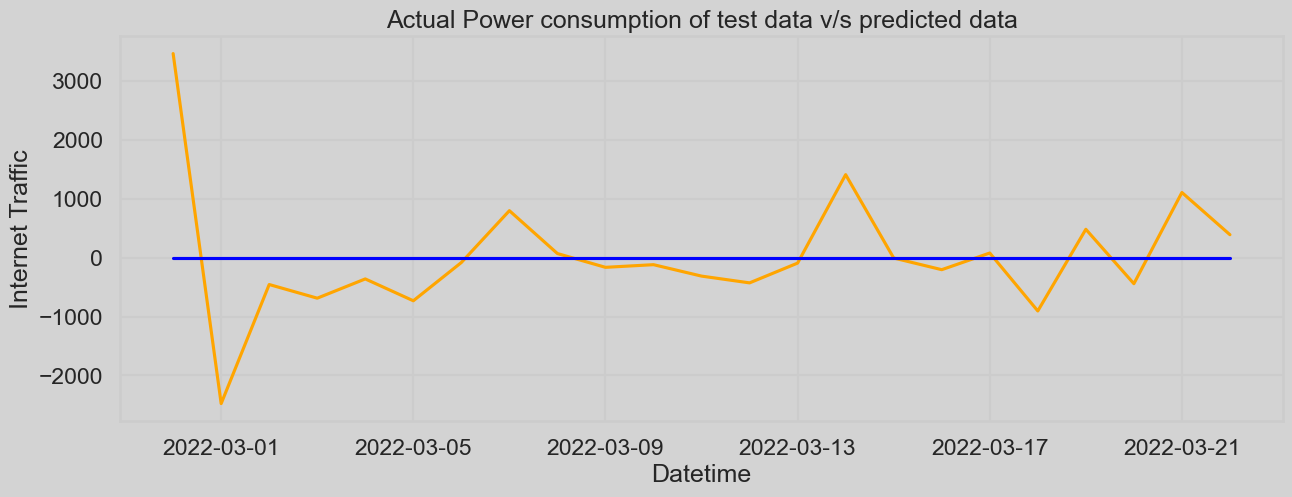

In [187]:
plt.figure(figsize=(15,5),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.title('Actual Power consumption of test data v/s predicted data')
plt.plot(test['Daily Visitors Diff'], c='orange')
plt.plot(test['pred_sarima'], c='blue');
plt.xlabel('Datetime')
plt.ylabel('Internet Traffic');

# building XG boosting model

In [188]:
import xgboost as xgb

In [189]:
new_train = df.loc[df.index < '28-02-2022']
new_test = df.loc[df.index >= '28-02-2022']

print(new_train.shape)
print(new_test.shape)

(149, 6)
(23, 6)


In [191]:
input = ['Day','year','month','name_of_week']
output = ['Daily Visitors Diff']

In [192]:
X_train = new_train[input]
y_train = new_train[output]

X_test = new_test[input]
y_test = new_test[output]

In [193]:
#model building

new_model = xgb.XGBRegressor(base_score=1, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=100,
                       objective='reg:squarederror',
                       max_depth=10,learning_rate=0.1,gamma=1)
#predicting the model
new_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:551.00408	validation_1-rmse:1013.27329
[100]	validation_0-rmse:2.45949	validation_1-rmse:970.76954
[114]	validation_0-rmse:1.28879	validation_1-rmse:971.74503


XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [194]:
new_model.feature_importances_

array([0.09975287, 0.07033287, 0.08071235, 0.7492019 ], dtype=float32)

In [195]:
XG_boosting_RMSE=new_model.best_score
print(f'rmse score for Xg boosting is {XG_boosting_RMSE}')

rmse score for Xg boosting is 878.2045287455734


In [196]:
X_test['prediction'] = new_model.predict(X_test)
df = df.merge(X_test[['prediction']], how='left', left_index=True, right_index=True)

In [197]:
y_test

,Daily Visitors Diff
Date,
2022-02-28,3466.0
2022-03-01,-2478.0
2022-03-02,-456.0
2022-03-03,-688.0
2022-03-04,-361.0
2022-03-05,-732.0
2022-03-06,-82.0
2022-03-07,798.0
2022-03-08,70.0


In [200]:
X_test['Daily Visitors Diff']=y_test
X_test['Difference']=X_test['Daily Visitors Diff']-X_test.prediction
X_test

,Day,year,month,name_of_week,prediction,Daily Visitors Diff,Difference
Date,,,,,,,
2022-02-28,28,2022,2,0,709.519470,3466.0,2756.480530
2022-03-01,1,2022,3,1,-3.293670,-2478.0,-2474.706330
2022-03-02,2,2022,3,2,-73.859146,-456.0,-382.140854
2022-03-03,3,2022,3,3,151.505035,-688.0,-839.505035
2022-03-04,4,2022,3,4,-388.136658,-361.0,27.136658
2022-03-05,5,2022,3,5,-200.214569,-732.0,-531.785431
2022-03-06,6,2022,3,6,-198.141022,-82.0,116.141022
2022-03-07,7,2022,3,0,848.761047,798.0,-50.761047
2022-03-08,8,2022,3,1,54.513058,70.0,15.486942


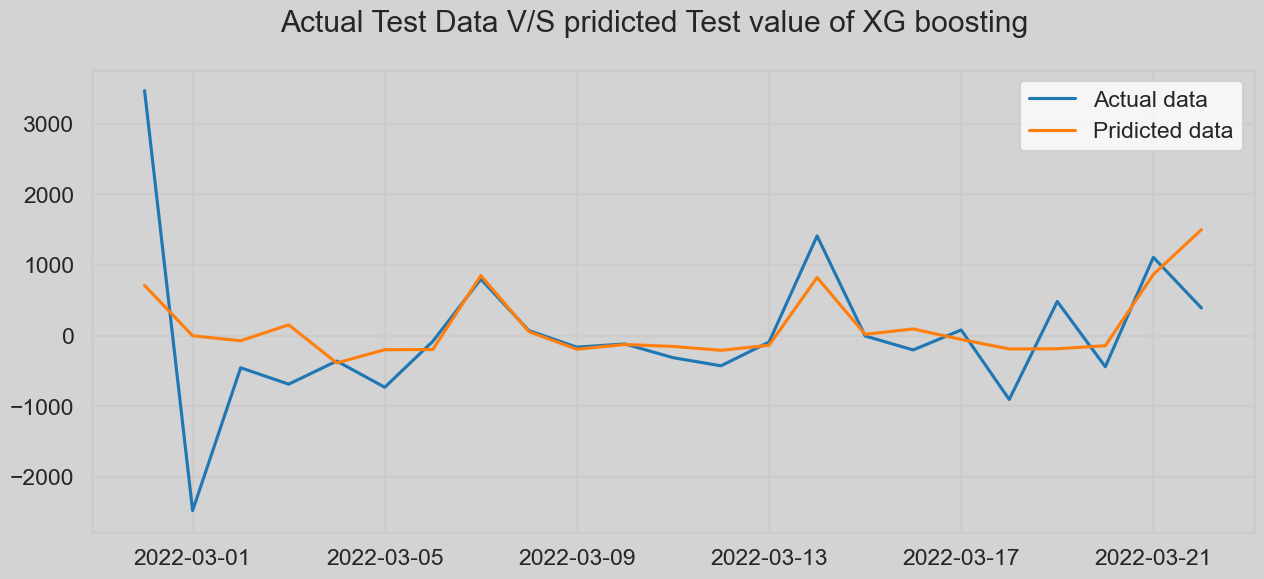

In [201]:
plt.figure(figsize=(15,6),facecolor='lightgrey')
plt.suptitle('Actual Test Data V/S pridicted Test value of XG boosting')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.plot(X_test['Daily Visitors Diff'])
plt.plot(X_test['prediction'])
plt.legend(['Actual data','Pridicted data'])

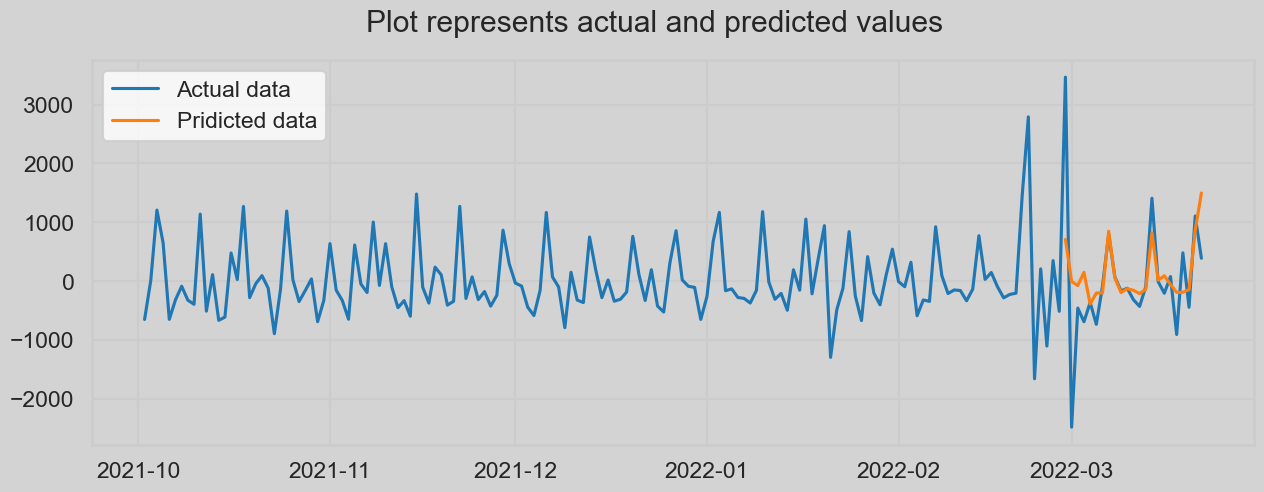

In [202]:
plt.figure(figsize=(15,5),facecolor='lightgrey')
plt.suptitle('Plot represents actual and predicted values')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.plot(df['Daily Visitors Diff'])
plt.plot(df['prediction'])
plt.legend(['Actual data','Pridicted data'])

In [205]:
#Compare the results 

data = {"MODEL":pd.Series(["AutoRegressive","Simple Exponential smoothing","Holts winter exponential smoothing with Add seasonality and Add trend","Arima","Sarima","XG Boosting"]),"RMSE_Values":pd.Series([AR_mean_square_error,SES_rmse,hwaa_rmse,rmse_arima,rmse_sarima,XG_boosting_RMSE])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
5,XG Boosting,878.204529
0,AutoRegressive,1039.185885
1,Simple Exponential smoothing,1045.397628
4,Sarima,1045.495971
2,Holts winter exponential smoothing with Add se...,1115.014065
3,Arima,1158.165918
